In [1]:
import pandas as pd 
import numpy as np
import nltk
import tensorflow as tf
import os


In [2]:
data =pd.read_csv("meta_df.csv")
data

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04


In [3]:
data["supercategory"].value_counts()

Plastic bag & wrapper    850
Cigarette                667
Unlabeled litter         517
Bottle                   439
Bottle cap               289
Other plastic            273
Can                      273
Carton                   251
Cup                      192
Straw                    161
Paper                    148
Broken glass             138
Styrofoam piece          112
Pop tab                   99
Lid                       87
Plastic container         72
Aluminium foil            62
Plastic utensils          37
Rope & strings            29
Paper bag                 27
Scrap metal               20
Food waste                 8
Shoe                       7
Blister pack               7
Squeezable tube            7
Glass jar                  6
Plastic glooves            4
Battery                    2
Name: supercategory, dtype: int64

In [4]:
image_Path=[]
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        image_Path.append(os.path.join(dirname, filename))

In [5]:
image_Path.pop(0)

'data/annotations.json'

In [6]:
image_Path

['data/batch_1\\000000.jpg',
 'data/batch_1\\000001.jpg',
 'data/batch_1\\000003.jpg',
 'data/batch_1\\000004.jpg',
 'data/batch_1\\000005.jpg',
 'data/batch_1\\000006.jpg',
 'data/batch_1\\000007.jpg',
 'data/batch_1\\000008.jpg',
 'data/batch_1\\000010.jpg',
 'data/batch_1\\000011.jpg',
 'data/batch_1\\000012.jpg',
 'data/batch_1\\000013.jpg',
 'data/batch_1\\000014.jpg',
 'data/batch_1\\000015.jpg',
 'data/batch_1\\000016.jpg',
 'data/batch_1\\000017.jpg',
 'data/batch_1\\000019.jpg',
 'data/batch_1\\000021.jpg',
 'data/batch_1\\000022.jpg',
 'data/batch_1\\000023.jpg',
 'data/batch_1\\000024.jpg',
 'data/batch_1\\000025.jpg',
 'data/batch_1\\000026.jpg',
 'data/batch_1\\000027.jpg',
 'data/batch_1\\000028.jpg',
 'data/batch_1\\000029.jpg',
 'data/batch_1\\000030.jpg',
 'data/batch_1\\000031.jpg',
 'data/batch_1\\000032.jpg',
 'data/batch_1\\000035.jpg',
 'data/batch_1\\000037.jpg',
 'data/batch_1\\000038.jpg',
 'data/batch_1\\000040.jpg',
 'data/batch_1\\000042.jpg',
 'data/batch_1

In [7]:
import cv2

In [8]:
image_read = []
for image in image_Path:
  image1 = cv2.imread(image)
  
  resize= cv2.resize(image1,(300,300))
  rescale= (resize / 255).astype(np.float32)

  image_read.append(rescale)
image_array = np.asarray(image_read)

In [9]:
len(image_array)
print(image_array[0])

[[[0.09803922 0.11764706 0.10980392]
  [0.04705882 0.07450981 0.05490196]
  [0.09411765 0.09411765 0.07058824]
  ...
  [0.3254902  0.4        0.5647059 ]
  [0.68235296 0.6862745  0.7607843 ]
  [0.8862745  0.9098039  0.8666667 ]]

 [[0.08235294 0.10588235 0.08235294]
  [0.07058824 0.10588235 0.06666667]
  [0.08627451 0.09411765 0.04705882]
  ...
  [0.34509805 0.42352942 0.5529412 ]
  [0.87058824 0.8784314  0.8980392 ]
  [0.9529412  0.9607843  0.9137255 ]]

 [[0.11372549 0.09019608 0.05098039]
  [0.07058824 0.04705882 0.00784314]
  [0.10588235 0.07843138 0.03921569]
  ...
  [0.32156864 0.36862746 0.47058824]
  [0.8666667  0.87058824 0.84313726]
  [0.92156863 0.8901961  0.87058824]]

 ...

 [[0.22352941 0.25490198 0.3019608 ]
  [0.20392157 0.20392157 0.2509804 ]
  [0.2509804  0.2627451  0.29411766]
  ...
  [0.53333336 0.53333336 0.5294118 ]
  [0.5137255  0.52156866 0.5294118 ]
  [0.60784316 0.62352943 0.7254902 ]]

 [[0.30588236 0.30980393 0.29411766]
  [0.3254902  0.32941177 0.34117648]


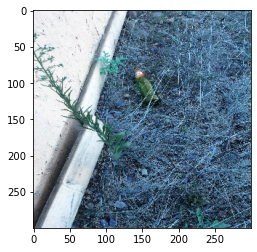

In [10]:
import matplotlib.pyplot as plt
plt.imshow(image_array[15])

In [11]:
from PIL import Image

for img in image_Path:
    image = Image.open(img)
    image.load()
    data = np.asarray(image)
    data_3d = data.astype('int32')                                        
    data_1d = data_3d.reshape(-1)                                                                                               #Scaling or normalization of pixels

    break
    break

In [12]:
print(data_3d)

[[[ 28  28  26]
  [ 31  31  29]
  [ 33  33  31]
  ...
  [216 229 220]
  [226 242 231]
  [233 242 237]]

 [[ 29  29  27]
  [ 31  31  29]
  [ 32  32  30]
  ...
  [221 234 225]
  [239 255 244]
  [236 245 240]]

 [[ 31  31  29]
  [ 31  31  29]
  [ 30  32  29]
  ...
  [222 235 226]
  [235 251 240]
  [237 246 241]]

 ...

 [[129 123 125]
  [128 122 124]
  [126 120 122]
  ...
  [191 161 153]
  [186 153 144]
  [172 142 132]]

 [[123 114 117]
  [121 112 115]
  [118 109 112]
  ...
  [178 148 140]
  [151 118 109]
  [135 104  99]]

 [[117 106 114]
  [112 101 109]
  [110  99 105]
  ...
  [147 115 116]
  [132  98  99]
  [120  90  92]]]


In [13]:
print(data_1d)

[ 28  28  26 ... 120  90  92]


In [14]:
from numpy import asarray

In [15]:
#normalize pixel value
pixels = asarray(image_array)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: float32
Min: 0.000, Max: 1.000
Min: 0.000, Max: 0.004


In [16]:
print (pixels)

[[[[3.8446751e-04 4.6136102e-04 4.3060363e-04]
   [1.8454441e-04 2.9219533e-04 2.1530181e-04]
   [3.6908881e-04 3.6908881e-04 2.7681663e-04]
   ...
   [1.2764322e-03 1.5686274e-03 2.2145330e-03]
   [2.6758939e-03 2.6912726e-03 2.9834679e-03]
   [3.4755864e-03 3.5678586e-03 3.3986929e-03]]

  [[3.2295272e-04 4.1522493e-04 3.2295272e-04]
   [2.7681663e-04 4.1522493e-04 2.6143793e-04]
   [3.3833142e-04 3.6908881e-04 1.8454441e-04]
   ...
   [1.3533257e-03 1.6608997e-03 2.1683970e-03]
   [3.4140716e-03 3.4448290e-03 3.5217225e-03]
   [3.7370243e-03 3.7677817e-03 3.5832373e-03]]

  [[4.4598232e-04 3.5371011e-04 1.9992310e-04]
   [2.7681663e-04 1.8454441e-04 3.0757405e-05]
   [4.1522493e-04 3.0757402e-04 1.5378701e-04]
   ...
   [1.2610535e-03 1.4455979e-03 1.8454441e-03]
   [3.3986929e-03 3.4140716e-03 3.3064208e-03]
   [3.6139947e-03 3.4909651e-03 3.4140716e-03]]

  ...

  [[8.7658595e-04 9.9961564e-04 1.1841600e-03]
   [7.9969241e-04 7.9969241e-04 9.8423695e-04]
   [9.8423695e-04 1.030373

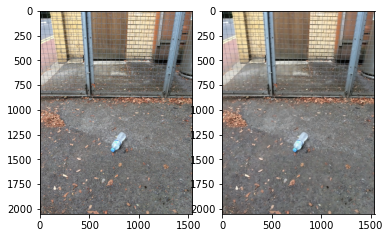

In [17]:
import numpy as np
from PIL import Image
for img in image_Path:
    image = Image.open(img)
    image.load()
    data = np.asarray(image)
    dst = cv2.fastNlMeansDenoisingColored(data,None,10,10,7,21)
    plt.subplot(121),plt.imshow(data)
    plt.subplot(122),plt.imshow(dst)
    plt.show()
    
    break

In [20]:
import cv2
from PIL import Image

for img in image_Path:
    image = Image.open(img)
    image.load()
    data = np.asarray(image)
    
    img1 = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)

    r, g, b = cv2.split(img1)
    
    titles = ['Original Image', 'Red', 'Green', 'Blue']
    images = [cv2.merge((r, g, b)), r, g, b]

    
#     plt.subplot(2, 2, 1)
#     plt.imshow(images[0])
#     plt.title(titles[0])
#     plt.xticks([])
#     plt.yticks([])
    
#     plt.subplot(2, 2, 2)
#     plt.imshow(images[1], cmap='Reds')
#     plt.title(titles[1])
#     plt.xticks([])
#     plt.yticks([])
    
#     plt.subplot(2, 2, 3)
#     plt.imshow(images[2], cmap='Greens')
#     plt.title(titles[2])
#     plt.xticks([])
#     plt.yticks([])
    
#     plt.subplot(2, 2, 4)
#     plt.imshow(images[3], cmap='Blues')
#     plt.title(titles[3])
#     plt.xticks([])
#     plt.yticks([])

    #plt.show()  
 
if __name__ == "__main__":
    main()

NameError: name 'main' is not defined